In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install sklearn

In [3]:
import numpy as np
import pandas as pd

In [4]:
url ="./Dataset/MY2022 Fuel Consumption Ratings.csv"
data = pd.read_csv(url,encoding='utf-8-sig')
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
data.shape

(946, 15)

In [6]:
data.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [8]:
data.corr()['Fuel Consumption (City (L/100 km)']

Model Year                                NaN
Engine Size(L)                       0.834925
Cylinders                            0.845688
Fuel Consumption (City (L/100 km)    1.000000
Fuel Consumption(Hwy (L/100 km))     0.922850
Fuel Consumption(Comb (L/100 km))    0.990321
Fuel Consumption(Comb (mpg))        -0.909477
CO2 Emissions(g/km)                  0.965632
CO2 Rating                          -0.920524
Smog Rating                         -0.523928
Name: Fuel Consumption (City (L/100 km), dtype: float64

In [9]:
data['Vehicle Class'].value_counts()

SUV: Small                 197
SUV: Standard              141
Mid-size                   117
Pickup truck: Standard     113
Subcompact                  80
Compact                     69
Full-size                   64
Two-seater                  51
Minicompact                 48
Pickup truck: Small         20
Station wagon: Small        19
Special purpose vehicle     12
Station wagon: Mid-size      8
Minivan                      7
Name: Vehicle Class, dtype: int64

In [10]:
def add_vehicleClass(inpt):
    if inpt == 'Pickup truck: Small' or inpt == 'Station wagon: Small' or inpt == 'Special purpose vehicle' or inpt == 'Station wagon: Mid-size' or inpt == 'Minivan':
        return 'Other'
    else:
        return inpt
data['Vehicle Class'] = data['Vehicle Class'].apply(add_vehicleClass)

In [11]:
data['Vehicle Class'].value_counts()

SUV: Small                197
SUV: Standard             141
Mid-size                  117
Pickup truck: Standard    113
Subcompact                 80
Compact                    69
Other                      66
Full-size                  64
Two-seater                 51
Minicompact                48
Name: Vehicle Class, dtype: int64

In [12]:
data['Transmission'].value_counts()

AS8     212
A8      100
AS10     87
A10      72
M6       71
AM7      70
A9       65
AM8      52
AV       43
AS6      39
A6       24
AV8      23
AS9      19
M7       14
AV7      10
AM6      10
AV6       8
AV10      8
AS7       7
M5        5
AV1       4
AS5       2
A7        1
Name: Transmission, dtype: int64

In [13]:
def add_transmission(inpt):
    if inpt == 'AS9' or inpt == 'M7' or inpt == 'AV7' or inpt == 'AM6' or inpt == 'AV6' or inpt == 'AV10' or inpt == 'AS7' or inpt == 'M5' or inpt == 'AV1' or inpt == 'AS5' or inpt == 'A7':
        return 'Other'
    else:
        return inpt
data['Transmission'] = data['Transmission'].apply(add_transmission)

In [14]:
data['Transmission'].value_counts()

AS8      212
A8       100
Other     88
AS10      87
A10       72
M6        71
AM7       70
A9        65
AM8       52
AV        43
AS6       39
A6        24
AV8       23
Name: Transmission, dtype: int64

In [15]:
data['Fuel Type'].value_counts()

Z    458
X    446
D     28
E     14
Name: Fuel Type, dtype: int64

In [16]:
data.head(2)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5


In [17]:
data=data.drop(columns=['Model Year','Model','Make','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Comb (mpg))'])
data

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Compact,2.4,4,AM8,Z,9.9,200,6,3
1,SUV: Small,3.5,6,AS10,Z,12.6,263,4,5
2,SUV: Small,2.0,4,AS10,Z,11.0,232,5,6
3,SUV: Small,2.0,4,AS10,Z,11.3,242,5,6
4,Compact,2.0,4,AS10,Z,11.2,230,5,7
...,...,...,...,...,...,...,...,...,...
941,SUV: Small,2.0,4,AS8,Z,10.7,219,5,5
942,SUV: Small,2.0,4,AS8,Z,10.5,219,5,5
943,SUV: Small,2.0,4,AS8,Z,11.0,232,5,7
944,SUV: Standard,2.0,4,AS8,Z,11.5,236,5,5


In [18]:
data =  pd.get_dummies(data)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Engine Size(L)                        946 non-null    float64
 1   Cylinders                             946 non-null    int64  
 2   Fuel Consumption (City (L/100 km)     946 non-null    float64
 3   CO2 Emissions(g/km)                   946 non-null    int64  
 4   CO2 Rating                            946 non-null    int64  
 5   Smog Rating                           946 non-null    int64  
 6   Vehicle Class_Compact                 946 non-null    uint8  
 7   Vehicle Class_Full-size               946 non-null    uint8  
 8   Vehicle Class_Mid-size                946 non-null    uint8  
 9   Vehicle Class_Minicompact             946 non-null    uint8  
 10  Vehicle Class_Other                   946 non-null    uint8  
 11  Vehicle Class_Picku

<AxesSubplot:>

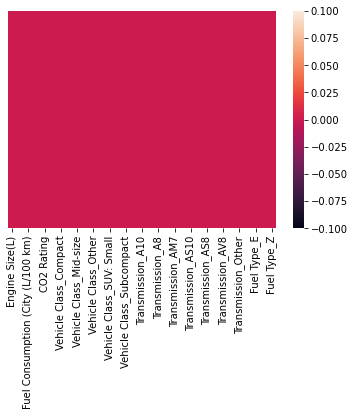

In [20]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False)

In [21]:
data.corr()['Fuel Consumption (City (L/100 km)']

Engine Size(L)                          0.834925
Cylinders                               0.845688
Fuel Consumption (City (L/100 km)       1.000000
CO2 Emissions(g/km)                     0.965632
CO2 Rating                             -0.920524
Smog Rating                            -0.523928
Vehicle Class_Compact                  -0.205300
Vehicle Class_Full-size                 0.009500
Vehicle Class_Mid-size                 -0.131271
Vehicle Class_Minicompact               0.073976
Vehicle Class_Other                    -0.088907
Vehicle Class_Pickup truck: Standard    0.274407
Vehicle Class_SUV: Small               -0.263008
Vehicle Class_SUV: Standard             0.227625
Vehicle Class_Subcompact               -0.018957
Vehicle Class_Two-seater                0.188802
Transmission_A10                        0.198423
Transmission_A6                         0.142323
Transmission_A8                         0.136373
Transmission_A9                        -0.053921
Transmission_AM7    

In [22]:
x = data.drop('Fuel Consumption (City (L/100 km)',axis=1)
y = data['Fuel Consumption (City (L/100 km)']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In [24]:
x_train.shape,x_test.shape

((709, 32), (237, 32))

In [25]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0)


In [27]:
reg= ExtraTreesRegressor()
reg.fit(x_train,y_train)
reg.feature_importances_

array([1.69148386e-01, 1.35440543e-01, 2.41434877e-01, 3.73621792e-01,
       1.87056445e-02, 9.19270799e-05, 1.77411568e-04, 5.03609436e-04,
       2.65132424e-04, 5.83407743e-04, 1.77361088e-03, 1.07482033e-03,
       6.63874598e-04, 5.61836748e-04, 2.14273382e-03, 3.56123136e-04,
       7.94617443e-05, 4.67589282e-04, 1.33092970e-04, 1.40503387e-03,
       1.75010349e-04, 6.31767629e-04, 9.21923067e-05, 6.03013420e-04,
       1.07224750e-04, 1.45960720e-04, 4.17447821e-04, 5.18577687e-04,
       6.00168248e-03, 4.12523754e-02, 7.81537816e-04, 6.42301270e-04])

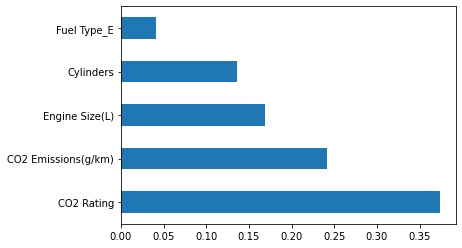

In [28]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(reg.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
def model_acc(model):
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

# LinearRegression

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

LinearRegression() --> 0.9874289272579025


# DecisionTree


In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

DecisionTreeRegressor() --> 0.9753146411744893


# Lasso

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)


Lasso() --> 0.9492024611208804


# RandomForestRegressor


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

RandomForestRegressor() --> 0.9831247410173877


# K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
model_acc(knn)

KNeighborsRegressor() --> 0.965186336505409


## Checking difference between RandomForestRegressor (labled y and predicted y)

In [35]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9984285395852777

In [36]:
rf.score(x_test,y_test)

0.983814819110012

In [37]:
prediction=rf.predict(x_test)

C:\Users\MiurangiMasakorala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel Consumption (City (L/100 km)', ylabel='Density'>

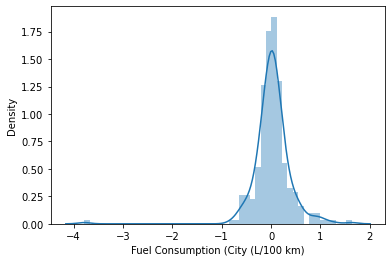

In [38]:
sns.distplot(y_test-prediction)

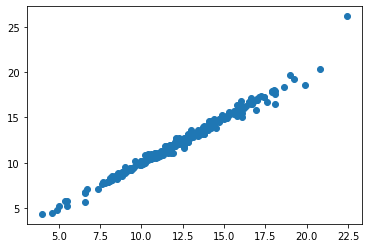

In [39]:
plt.scatter(y_test,prediction)

## RandomForest Hyperparameter Tuning

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Random Hyperparameter Grid

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


## Random Search Training

In [42]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

## Evaluate Random Search

In [44]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_train, y_train)

Model Performance
Average Error: 0.0962 degrees.
Accuracy = 99.19%.


In [45]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_train, y_train)

Model Performance
Average Error: 0.0051 degrees.
Accuracy = 99.96%.


In [46]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.78%.


# Grid Search with Cross Validation

In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [49]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [50]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_train, y_train)

Model Performance
Average Error: 0.5359 degrees.
Accuracy = 95.28%.


In [51]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -3.94%.


In [52]:
tuned_pred=best_grid.predict(x_test)

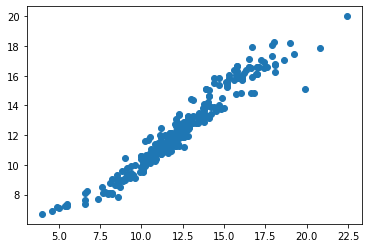

In [53]:
plt.scatter(y_test,tuned_pred)